**Download the dataset from the kaggle through the link:** https://www.kaggle.com/d4rklucif3r/restaurant-reviews


## Import Necessery Libraries

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Create Data Frame
**Add the downloaded dataset to Google Drive and read tsv file into dataframe**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
path = 'drive/MyDrive/Restaurant_Reviews.tsv'

df = pd.read_csv(path, sep='\t')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## View Info and Statistics on DataFrame

In [ ]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [ ]:
df.columns

Index(['Review', 'Liked'], dtype='object')


## Check for Unique values in "Liked" Column
**nunique() method gives the number of unique values in the particular column**

In [ ]:
df['Liked'].nunique()

2

**unique() method gives unique values in the particular column**

In [ ]:
print(df['Liked'].unique())

[1 0]


**value_counts() method gives the number of times the particular value repeated in that column through the data frame**

In [ ]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

## Data Visualizations

**Creating a count plot where it counts the entries of the column**

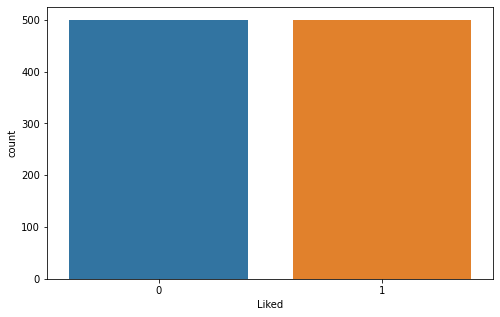

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=df.Liked);

## Define Parametres of Model, X and Y


In [ ]:
x=df['Review'].values
y=df['Liked'].values

## Split the Dataset into Training and Testing Sets
**import train_test_split from the scikit learn library.There the data frame is divided into four data sets: x_train, x_test, y_train, y_test**



In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [ ]:
x_train.shape


x_test.shape


y_train.shape


y_test.shape

(250,)

## Import CountVectorizer
**from sci-kit learn library import CountVectorizer**

**This count vectorizer transforms text into a vector based on the count of the words like the number of times the word is repeated in the sentence**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words='english')
x_train_vect=vect.fit_transform(x_train)
x_test_vect=vect.transform(x_test)

## Import Support Vector Classifier(SVC)
**Import Support Vector Classifier(SVC) from Support Vector Machine (SVM) library and assign it to a variable named model**

In [ ]:
from sklearn.svm import SVC
model=SVC()

## Train the Model
**fit method is used to train the model and pass training datasets as arguments**

In [ ]:
model.fit(x_train_vect,y_train)

SVC()

### Predict the Test Results
**Use predict method to predict the test results. Pass the x variables of the testing dataset**

In [ ]:
y_pred=model.predict(x_test_vect)

###Evaluate the Model
**Import accuracy_score from scikit learn metrics library and then pass two arguments to which we have to compare and evaluate**

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.72

## MultinomialNB Direct Method
**we will predict without using the pipeline**

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import LocalOutlierFactor
vect = CountVectorizer()
tfidf = TfidfTransformer()
clf = SGDClassifier()
vX = vect.fit_transform(x_train)
tfidfX = tfidf.fit_transform(vX)
clf.fit(tfidfX,y_train)
predicted = clf.predict(tfidfX)
# evaluate on test set
vX = vect.fit_transform(x_test)
tfidfX = tfidf.fit_transform(vX)
clf.fit(tfidfX,y_test)
predicted = clf.predict(tfidfX)
predicted

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0])

## Using Pipeline
**Now using pipeline we just need to use very few lines of code. We just have to pass all the methods we are willing to use as arguments in the pipeline method**

In [ ]:
!pip install transformers
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from transformers import pipeline
pipe_line = pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])
predicted = pipe_line.fit(x_train).predict(x_train)
# Now evaluate all steps on test set
predicted = pipe_line.predict(x_test)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


TypeError: ignored

**let’s use the pipeline method. Import make_pipeline from the pipeline library and pass CountVectorizer and SVC as arguments**

In [ ]:
from sklearn.pipeline import make_pipeline
text_model=make_pipeline(CountVectorizer(),SVC())

**Train the Model with Training Sets**

**use fit method to train the model**

In [ ]:
text_model.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

**Predict the Test Results using predict method**

In [ ]:
y_pred=text_model.predict(x_test)

**Evaluate the Model using accuracy_method**

In [ ]:
accuracy_score(y_pred,y_test)

0.792

## Save the Model using Joblib
**Import joblib and using dump method and pass two arguments, one is the model and the other is the name of our file**

In [ ]:
import joblib
joblib.dump(text_model,'Verzeo_Project')

['Verzeo_Project']

In [ ]:
import joblib
text_model=joblib.load('Verzeo_Project')

## Implement our Trained Model on new Reviews

In [ ]:
text_model.predict(['hello!!Love Your Food'])
text_model.predict(["omg!!it was too spice and i asked you don't add too much "])

array([0])

**Implemented support vector classifier and count vectorizer in this project and also used both direct method and using pipeline method on our model. created a model which predicts whether the review is positive or negative**

## Import Streamlit Library

In [ ]:
!pip install streamlit
import streamlit as st

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Create Heading and Input Box to write a New Review which we will label it positive or negative review using write and text_input methods**

In [ ]:
st.title("Sentiment Analysis on Restaurant Reviews")
st.write("## Write your Review on Restaurant")
review_text = st.text_input("Write your Review here")

2022-07-12 13:06:29.660 
  command:

    streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py [ARGUMENTS]


**Write to screen as positive or negative review based on given input by user using the joblib saved model**

In [ ]:
def review(text_model,review_text):
    return text_model.predict([review_text])[0]
if review_text:
    if review(text_model,review_text):
        st.write("its a Positive Review")
    else:
        st.write("its a Negative Review")